In [1]:
from geobase import GeoBase
import geopandas as gpd

# Criar a base geográfica para municípios
geobase = GeoBase(level="Municipality", reset=False)

# Baixar o mapa de todos os municípios (GeoDataFrame)
map_df = geobase.map(year=2020)  # Dados do IBGE via geobr

# Filtrar apenas o Rio de Janeiro (código IBGE 3304557)
rio_df = map_df[map_df["code_muni"] == 3304557].copy()

# Atualizar a geobase para usar apenas o Rio
geobase.mapdf = rio_df

c:\Users\carlo\anaconda3\envs\geo_env\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(


In [2]:
# Gerar população sintética (1% da população real estimada)
geobase.generate_populations(scale=1)
# Acessar os dados da população
pop_df = geobase.pop  # GeoDataFrame com colunas: sex, age, geometry, longitude, latitude

# Visualizar as primeiras linhas
print(pop_df.head())

   sex  age                     geometry  longitude   latitude
0    0   48   POINT (-43.36433 -22.8817) -43.364331 -22.881701
1    0   53  POINT (-43.19896 -22.98049) -43.198960 -22.980489
2    0   73  POINT (-43.54931 -23.00304) -43.549305 -23.003039
3    0    4  POINT (-43.39244 -22.85233) -43.392438 -22.852334
4    1    6  POINT (-43.67172 -22.90121) -43.671724 -22.901209


In [3]:
len(pop_df)

6921464

In [4]:
rio_df

,code_muni,name_muni,code_state,abbrev_state,population,geometry
3241,3304557.0,Rio De Janeiro,33.0,RJ,6921464.0,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12426..."


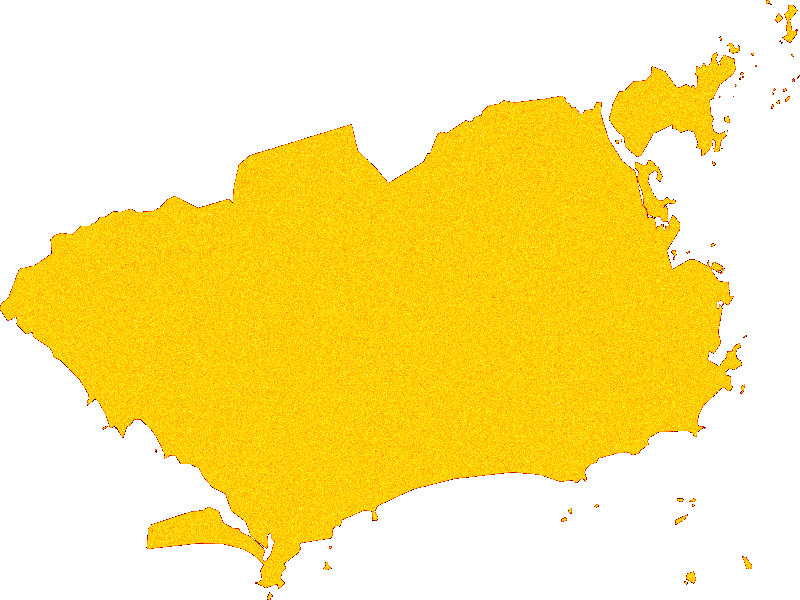

In [5]:
# Plotar o mapa de calor da população
geobase.plot_synthetic_pop()

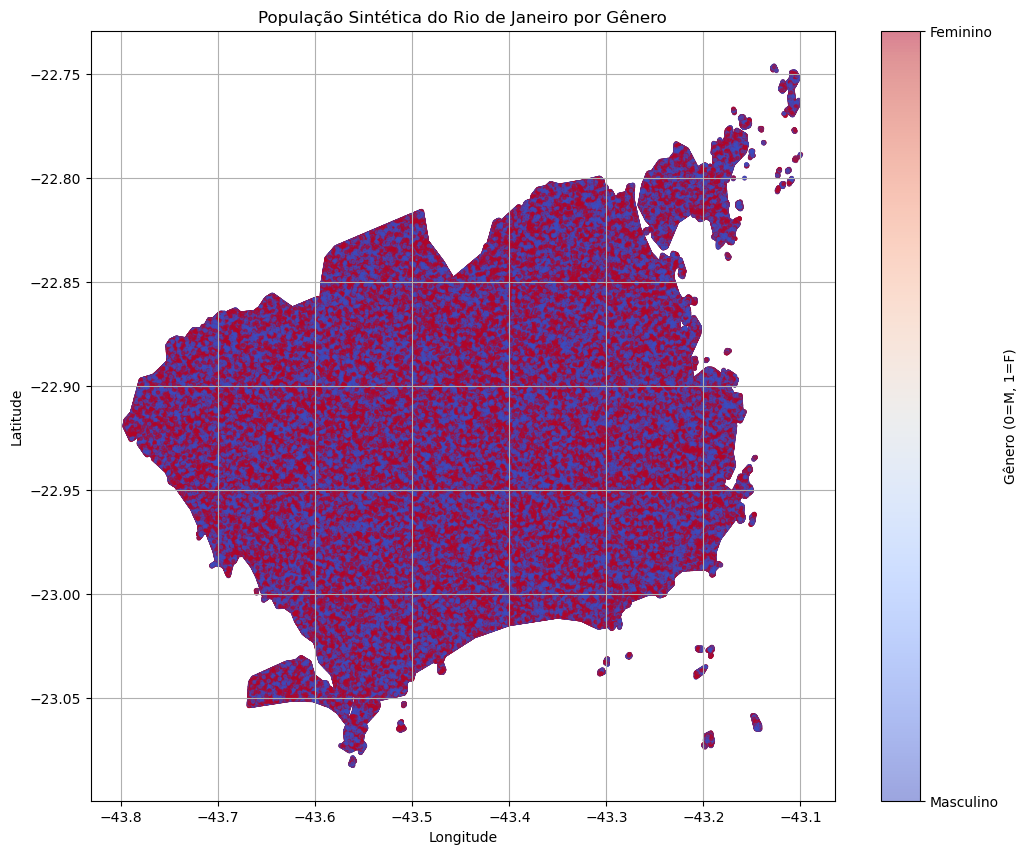

In [6]:
import matplotlib.pyplot as plt

# Configurar o plot
plt.figure(figsize=(12, 10))

# Plotar pontos coloridos por gênero (0=Masculino, 1=Feminino)
plt.scatter(
    pop_df.longitude,
    pop_df.latitude,
    c=pop_df.sex,           # Cores baseadas no gênero
    s=5,                    # Tamanho dos pontos
    alpha=0.5,              # Transparência
    cmap="coolwarm",        # Mapa de cores (azul/vermelho)
    vmin=0, vmax=1          # Garantir que 0 e 1 sejam os limites
)

# Adicionar barra de cores
cbar = plt.colorbar(label="Gênero (0=M, 1=F)", ticks=[0, 1])
cbar.ax.set_yticklabels(["Masculino", "Feminino"])

# Configurações finais
plt.title("População Sintética do Rio de Janeiro por Gênero")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()